In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal_inc" : (np.arange(N)//40 +  np.arange(N) % 21 + np.random.randn(N)),
                         "Signal_dec" : -(np.arange(N)//40 +  np.arange(N) % 21 + np.random.randn(N))
                        })


In [2]:
df_train.head(12)

,Date,Signal_inc,Signal_dec
0,2016-01-25,0.584764,-0.359514
1,2016-01-26,3.038934,-1.140563
2,2016-01-27,2.397363,-4.195080
3,2016-01-28,1.049060,-3.748770
4,2016-01-29,5.624465,-4.221018
5,2016-01-30,5.952799,-4.246247
6,2016-01-31,5.969998,-7.400976
7,2016-02-01,8.849542,-7.112039
8,2016-02-02,8.632756,-9.872499
9,2016-02-03,9.444488,-8.245881


In [3]:
df_train.tail(12)

,Date,Signal_inc,Signal_dec
348,2017-01-07,20.205500,-19.810601
349,2017-01-08,21.376619,-21.063184
350,2017-01-09,22.910819,-21.574296
351,2017-01-10,21.654251,-22.605474
352,2017-01-11,24.834727,-23.273299
353,2017-01-12,25.625523,-25.834233
354,2017-01-13,25.674487,-25.613689
355,2017-01-14,25.844566,-26.608588
356,2017-01-15,27.274658,-29.633920
357,2017-01-16,7.711065,-8.125731


<AxesSubplot:xlabel='Date'>

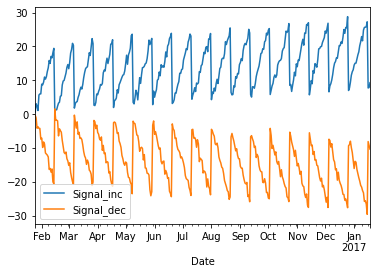

In [4]:
df_train.plot('Date' , ['Signal_inc', 'Signal_dec'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = ['Signal_dec' , 'Signal_inc'], iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Transformations': [('Signal_dec', 'None', '_', 'T+S+R'), ('Signal_dec', 'None', 'Diff_', 'T+S+R'), ('Signal_dec', 'None', 'RelDiff_', 'T+S+R'), ('Signal_dec', 'None', 'CumSum_', 'T+S+R'), ('Signal_inc', 'None', '_', 'T+S+R'), ('Signal_inc', 'None', 'Diff_', 'T+S+R'), ('Signal_inc', 'None', 'RelDiff_', 'T+S+R'), ('Signal_inc', 'None', 'CumSum_', 'T+S+R')], 'Cores': 8}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': '_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Diff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'RelDiff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': '_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'T

INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal_inc' Length=360  Min=0.584764 Max=28.797842  Mean=13.975421 StdDev=6.668718
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal_inc' Min=0.0 Max=1.0  Mean=0.474626 StdDev=0.23637
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_inc_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_inc_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_inc_LinearTrend_residue_zeroCycle[0.0]' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_inc_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.2696 MAPE_Forecast=0.0699 MAPE_Test=0.0545
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.1413 

INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal_dec', 'Signal_inc']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 3.503, ('PLOTTING', {'Signals': ['Signal_dec', 'Signal_inc']}))


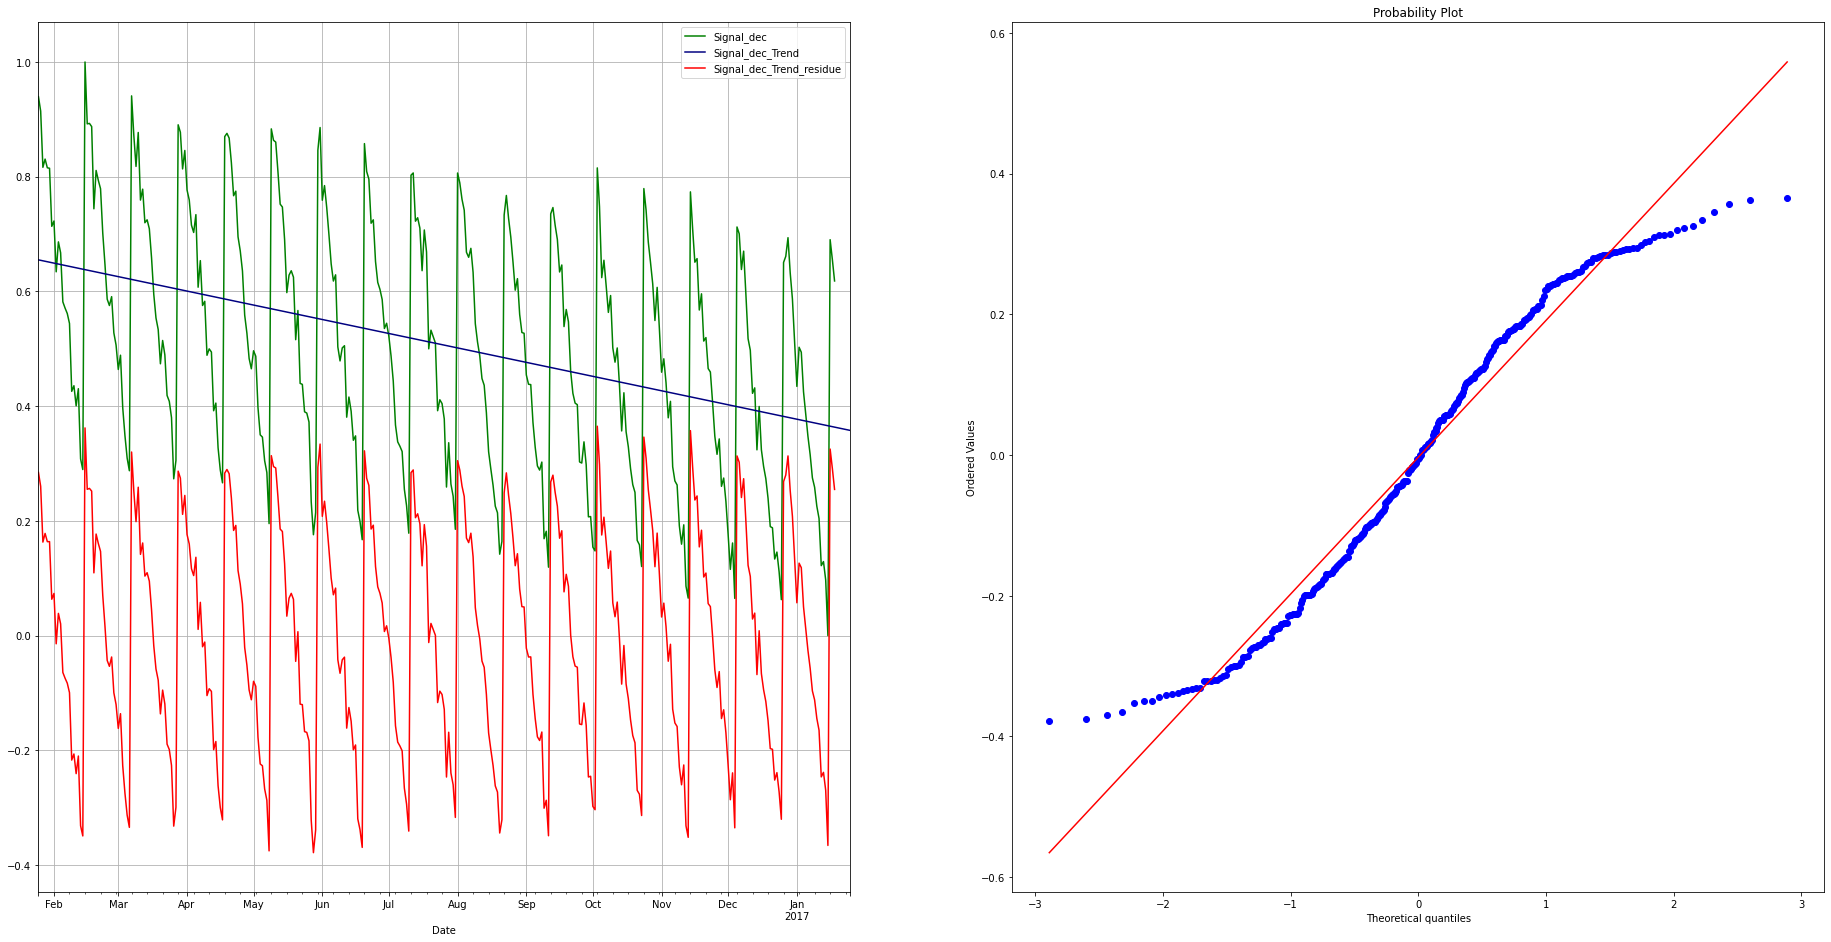

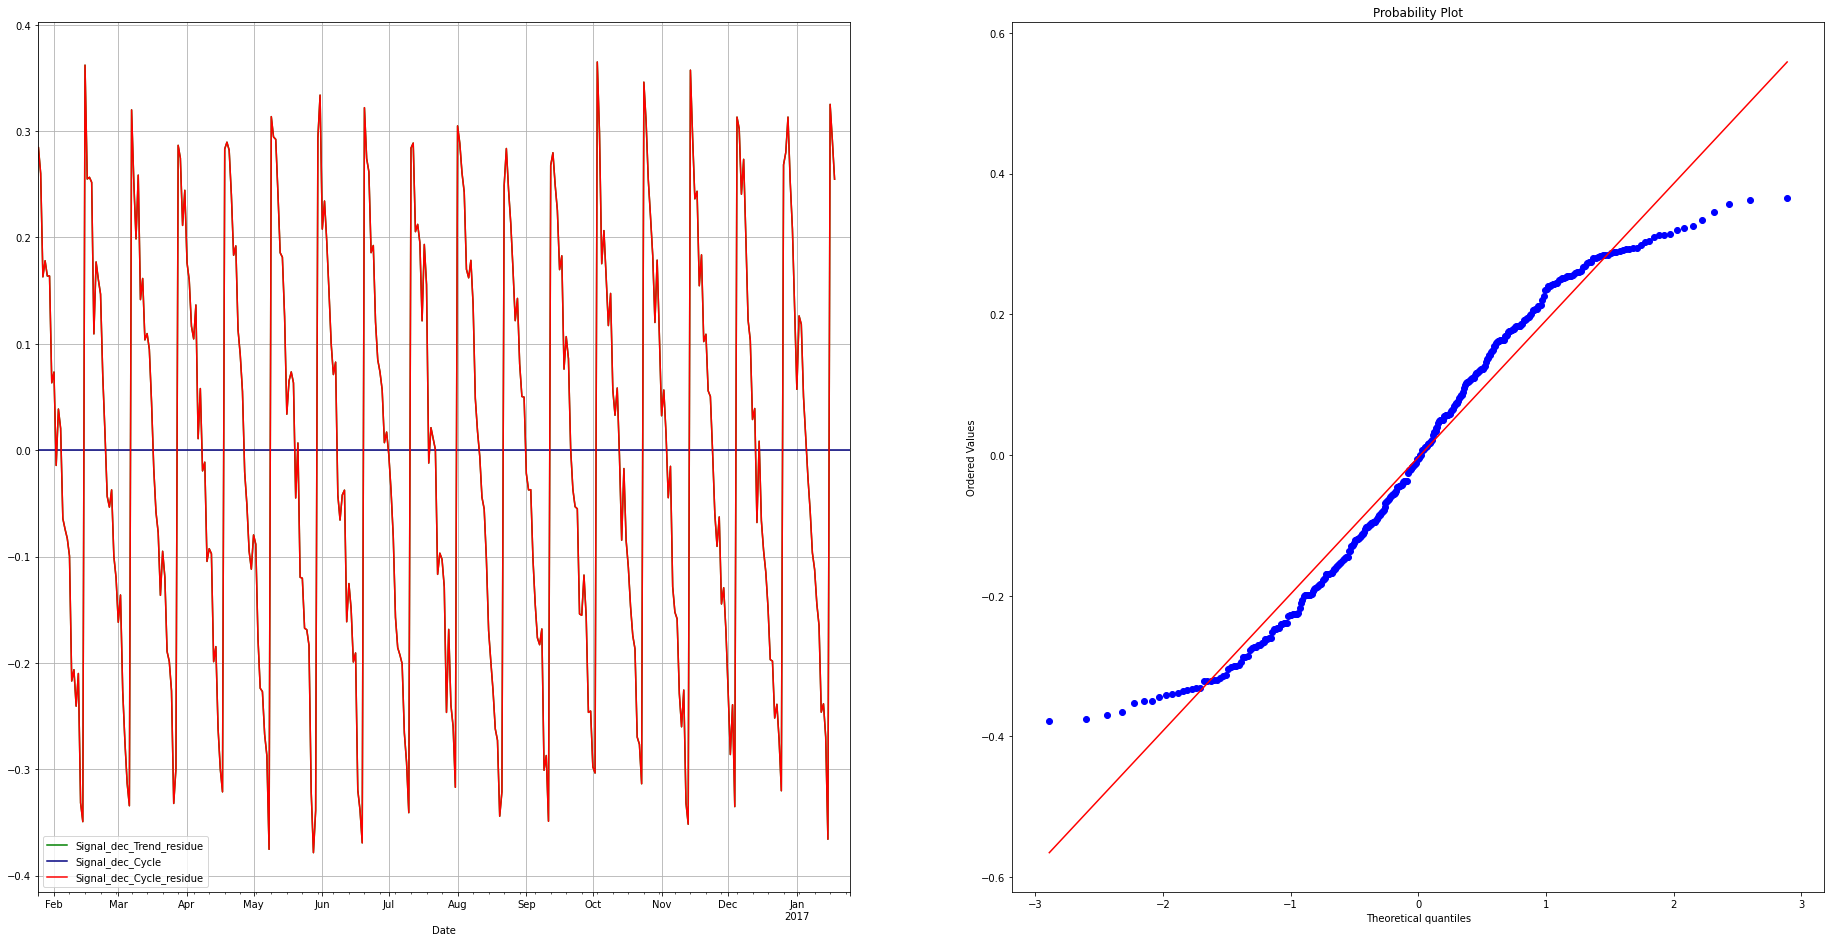

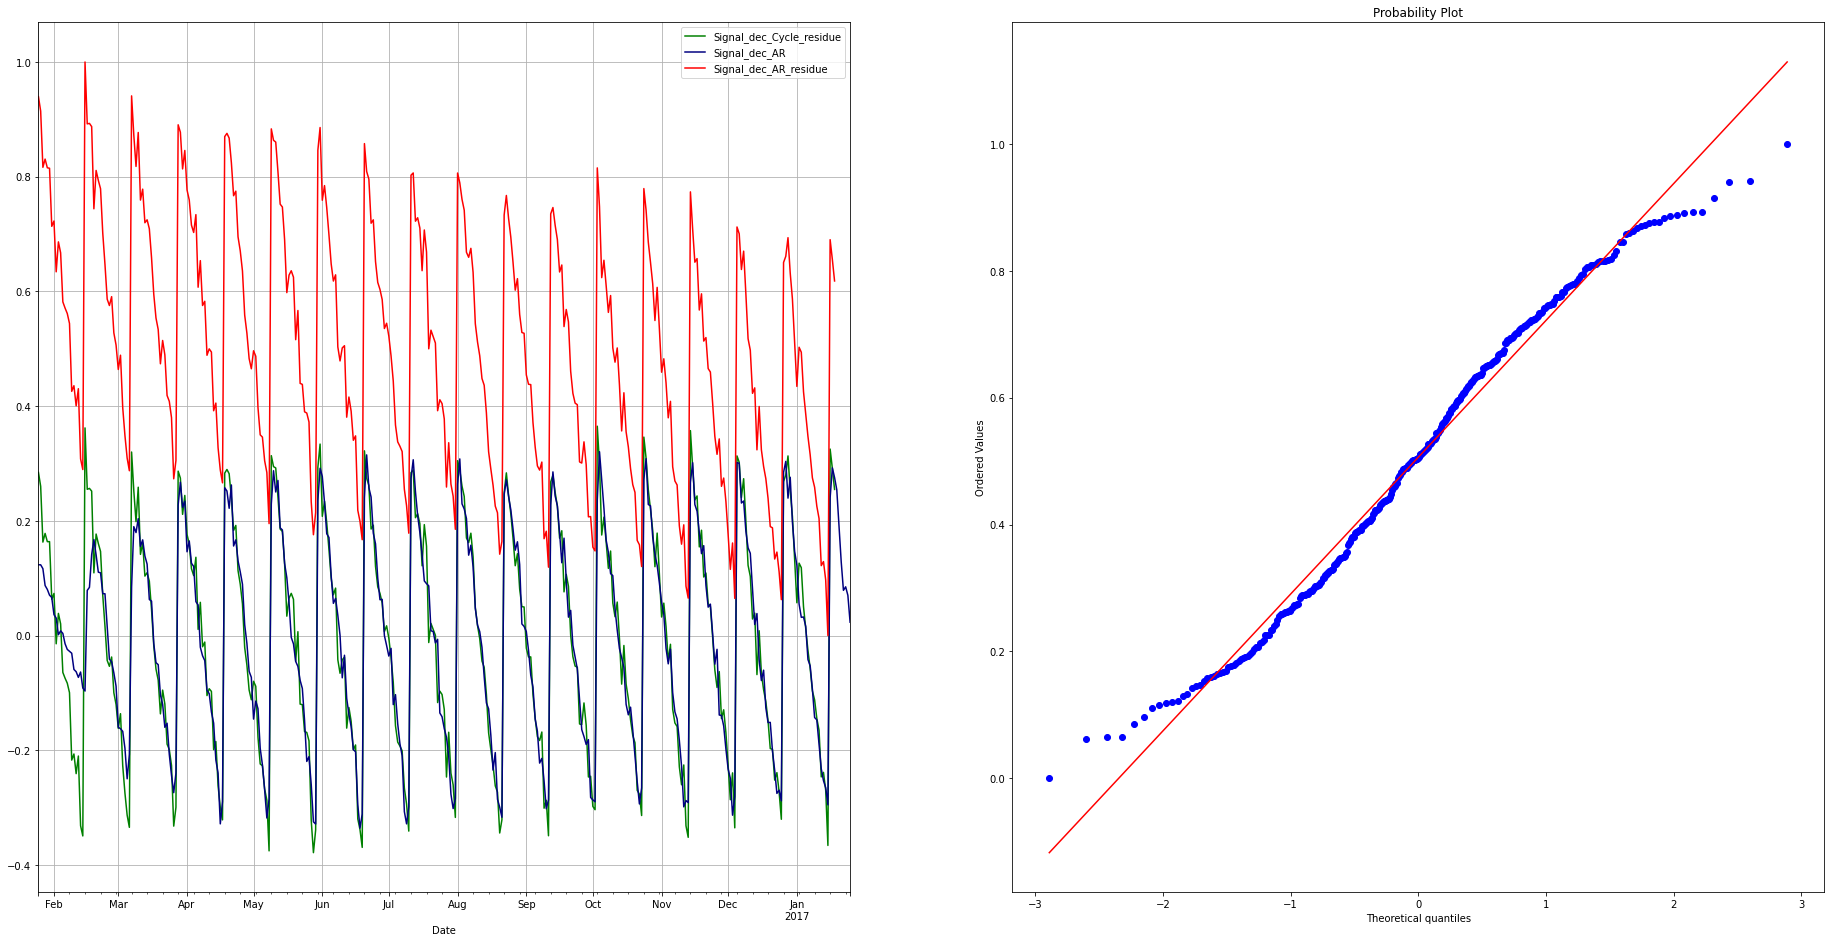

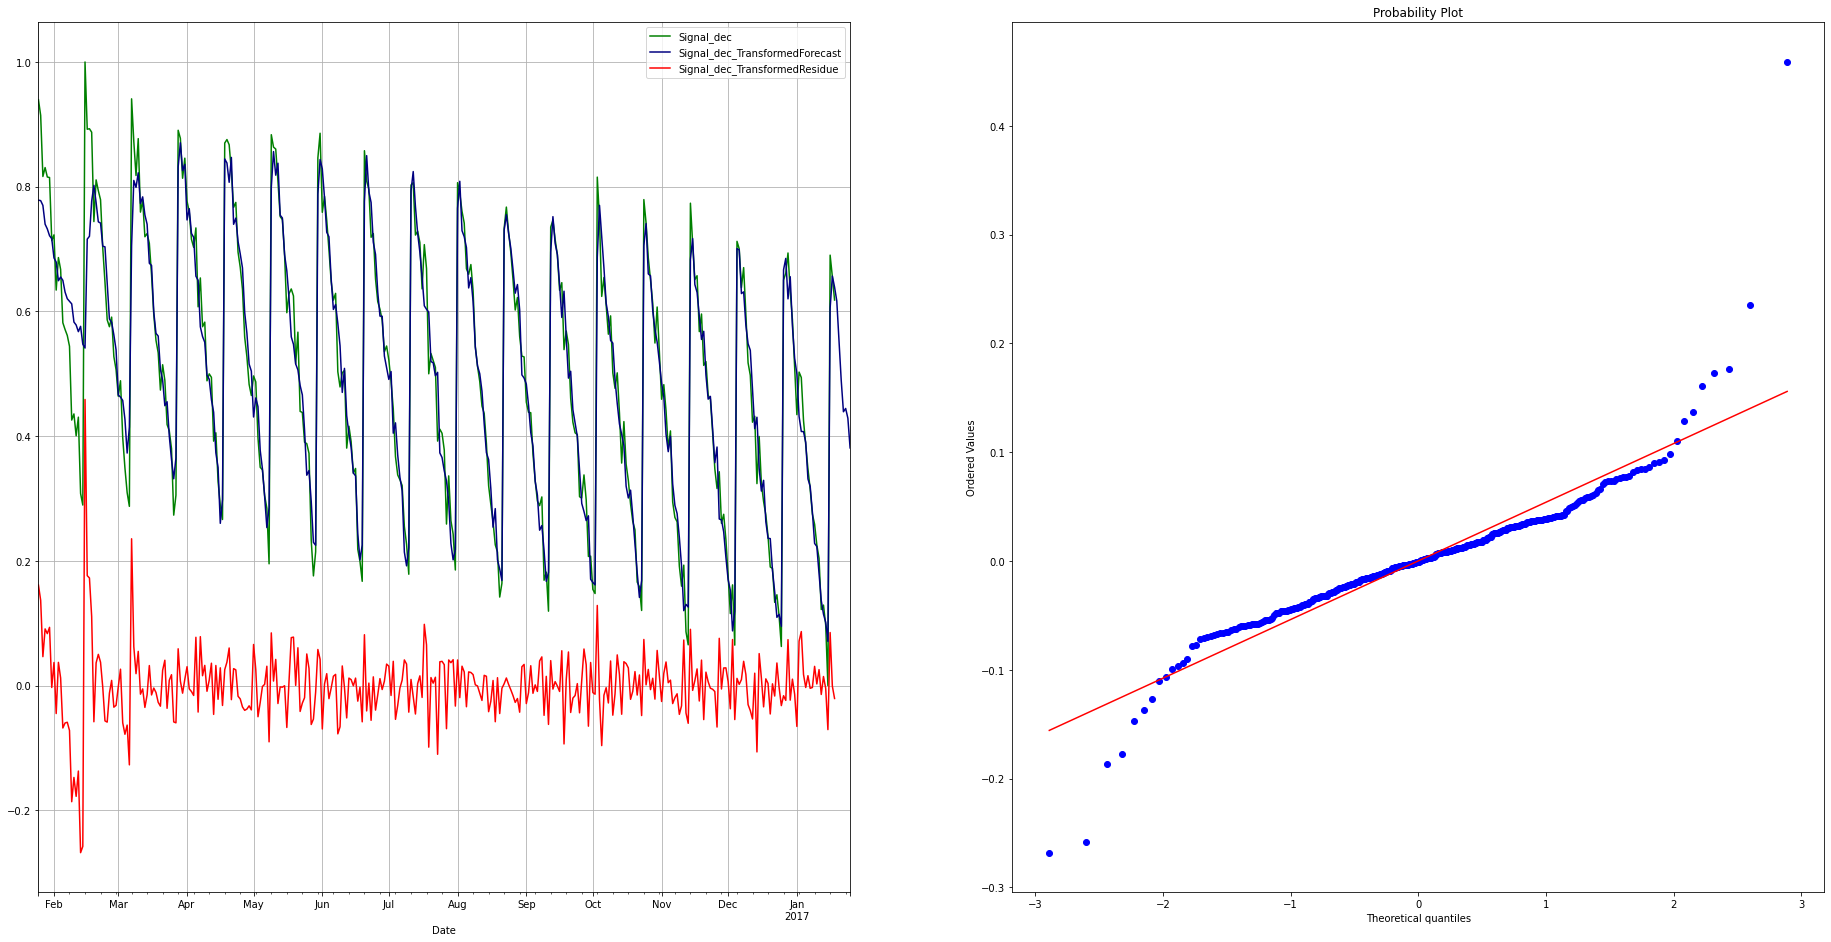

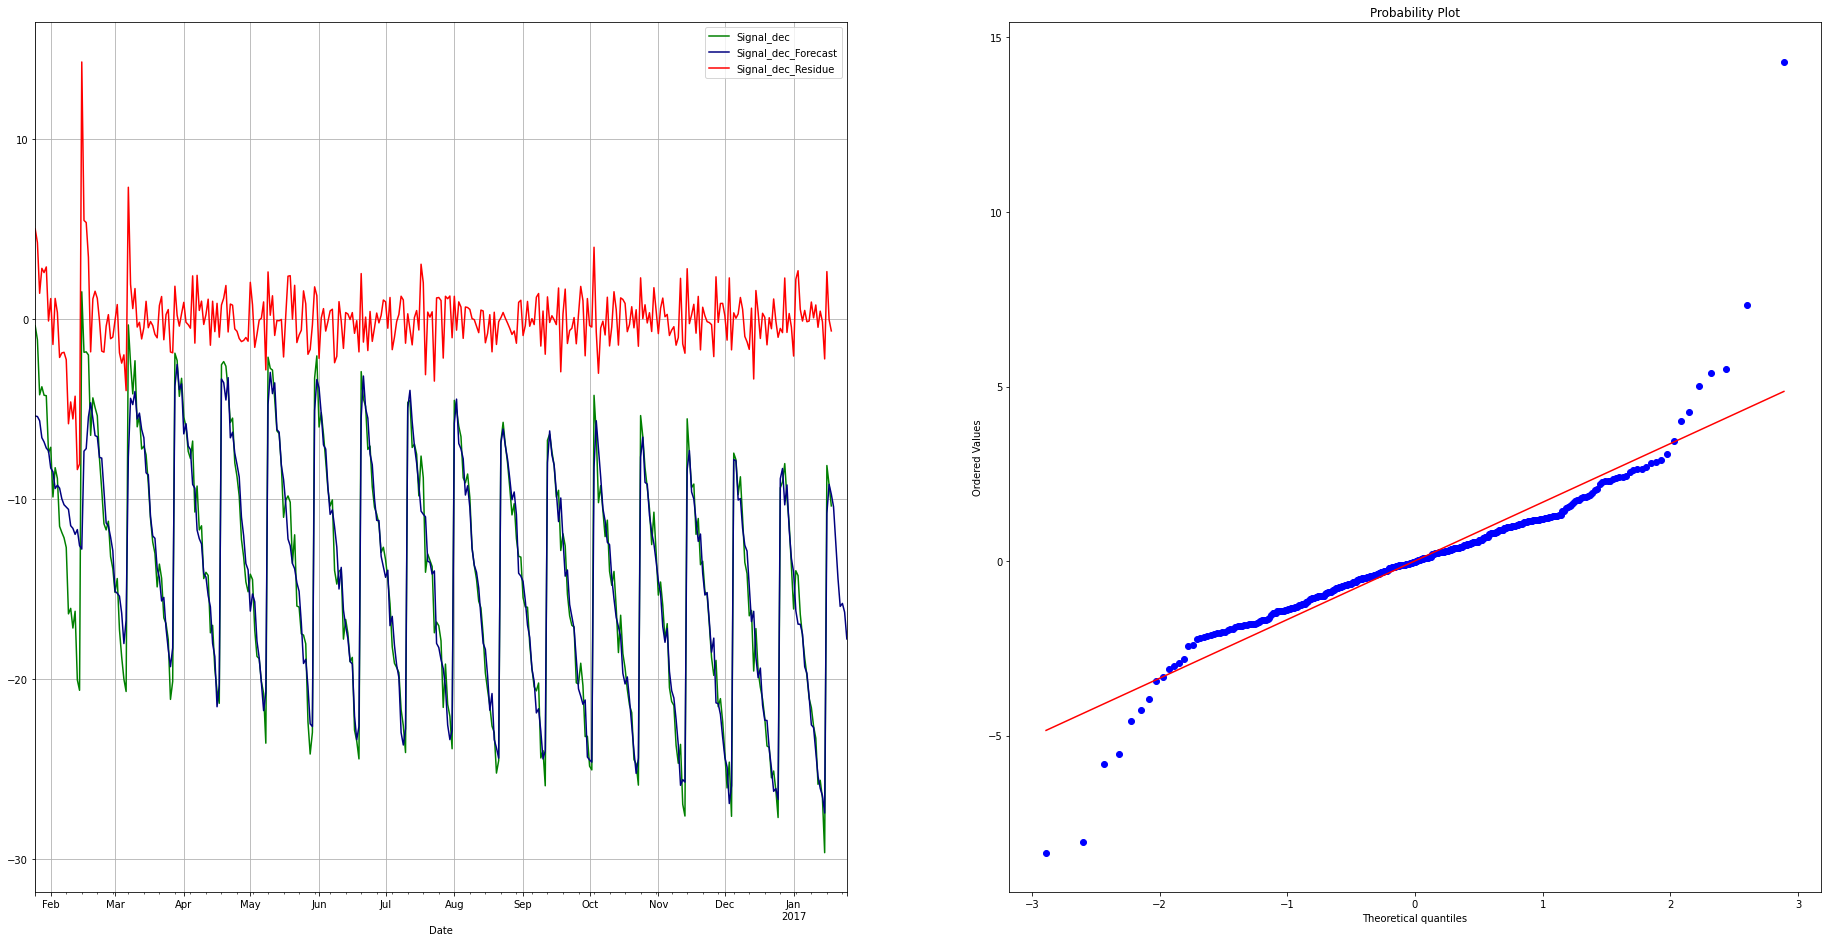

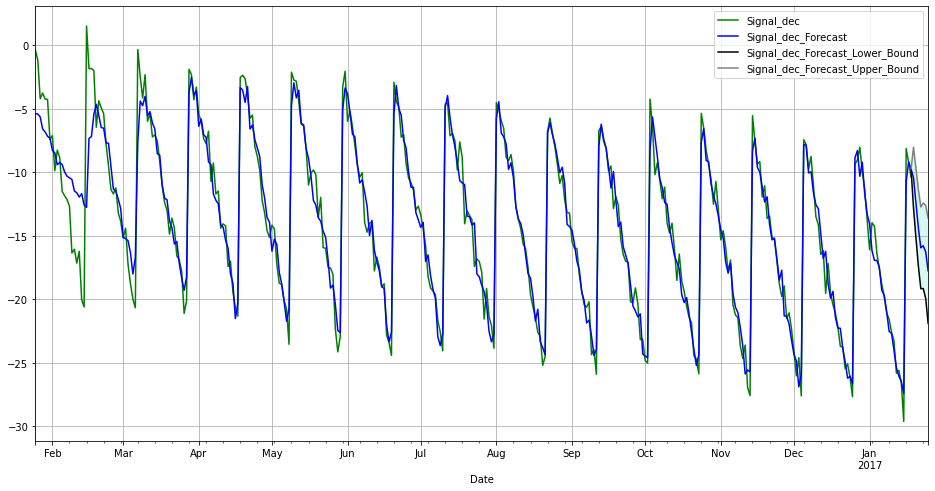

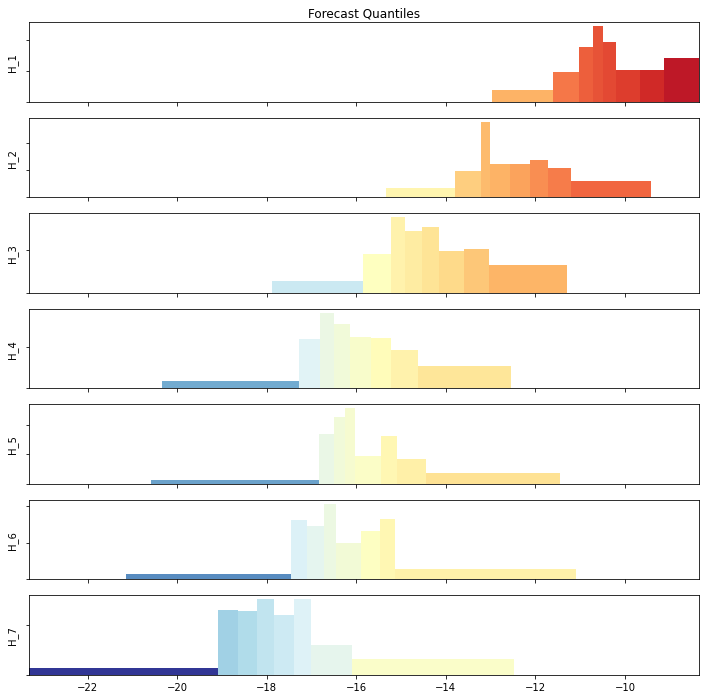

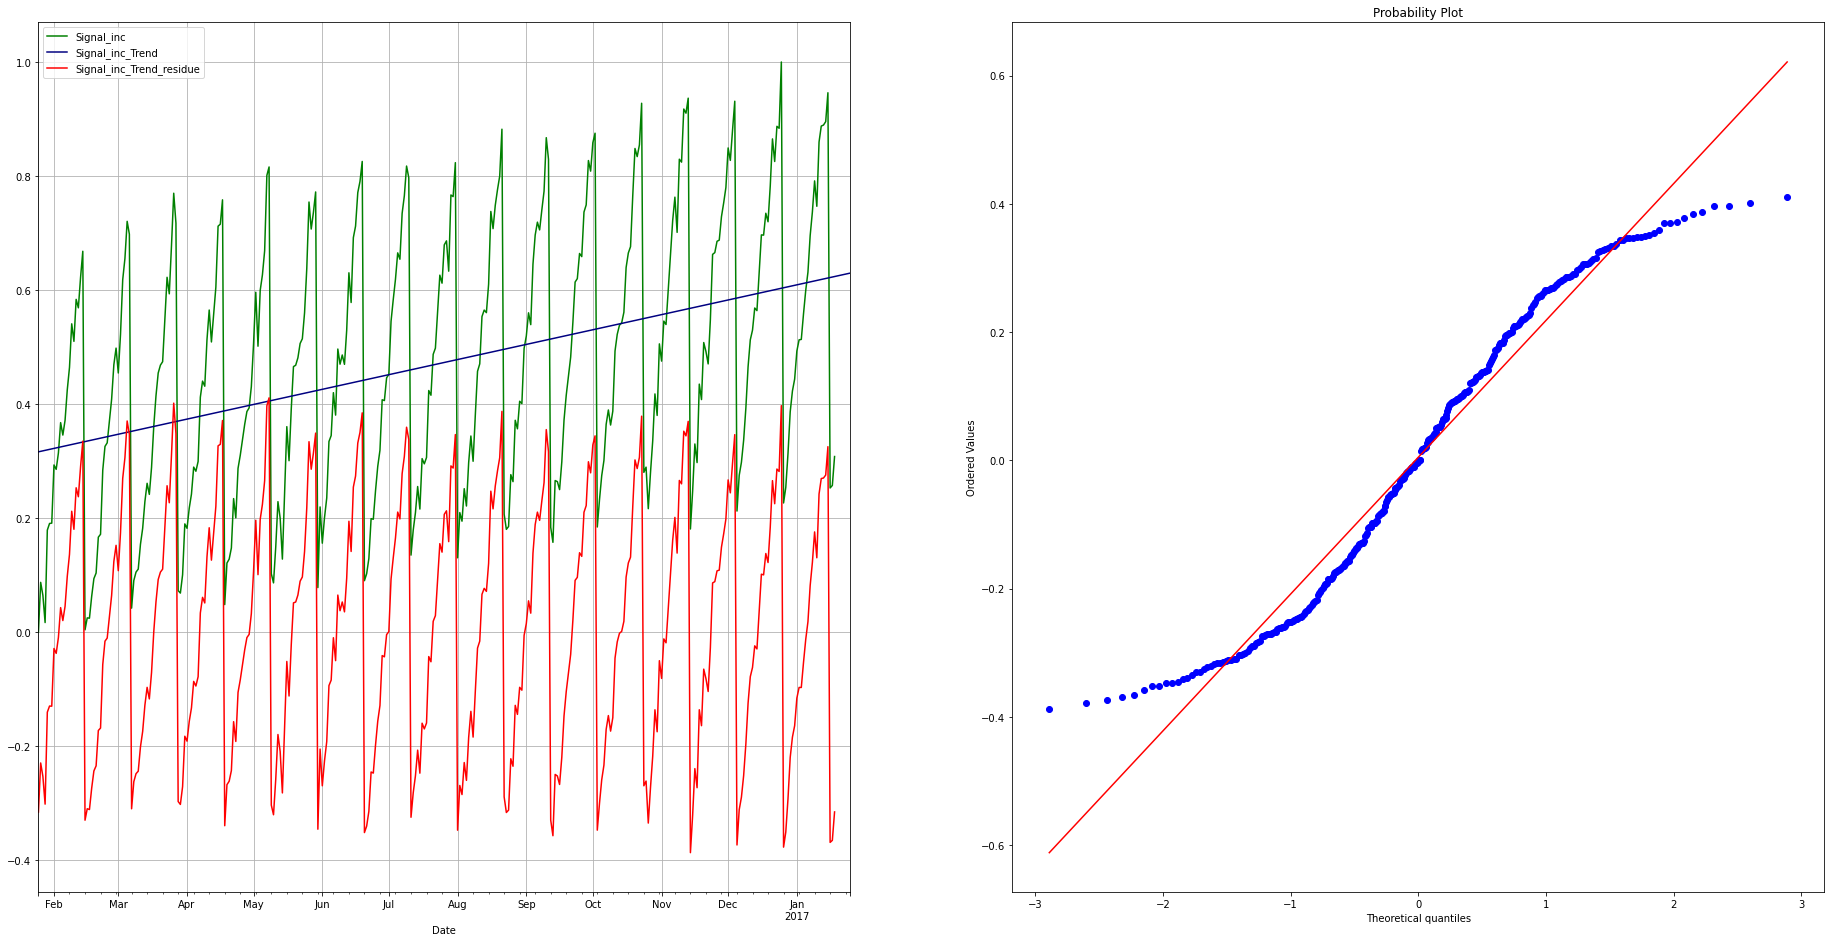

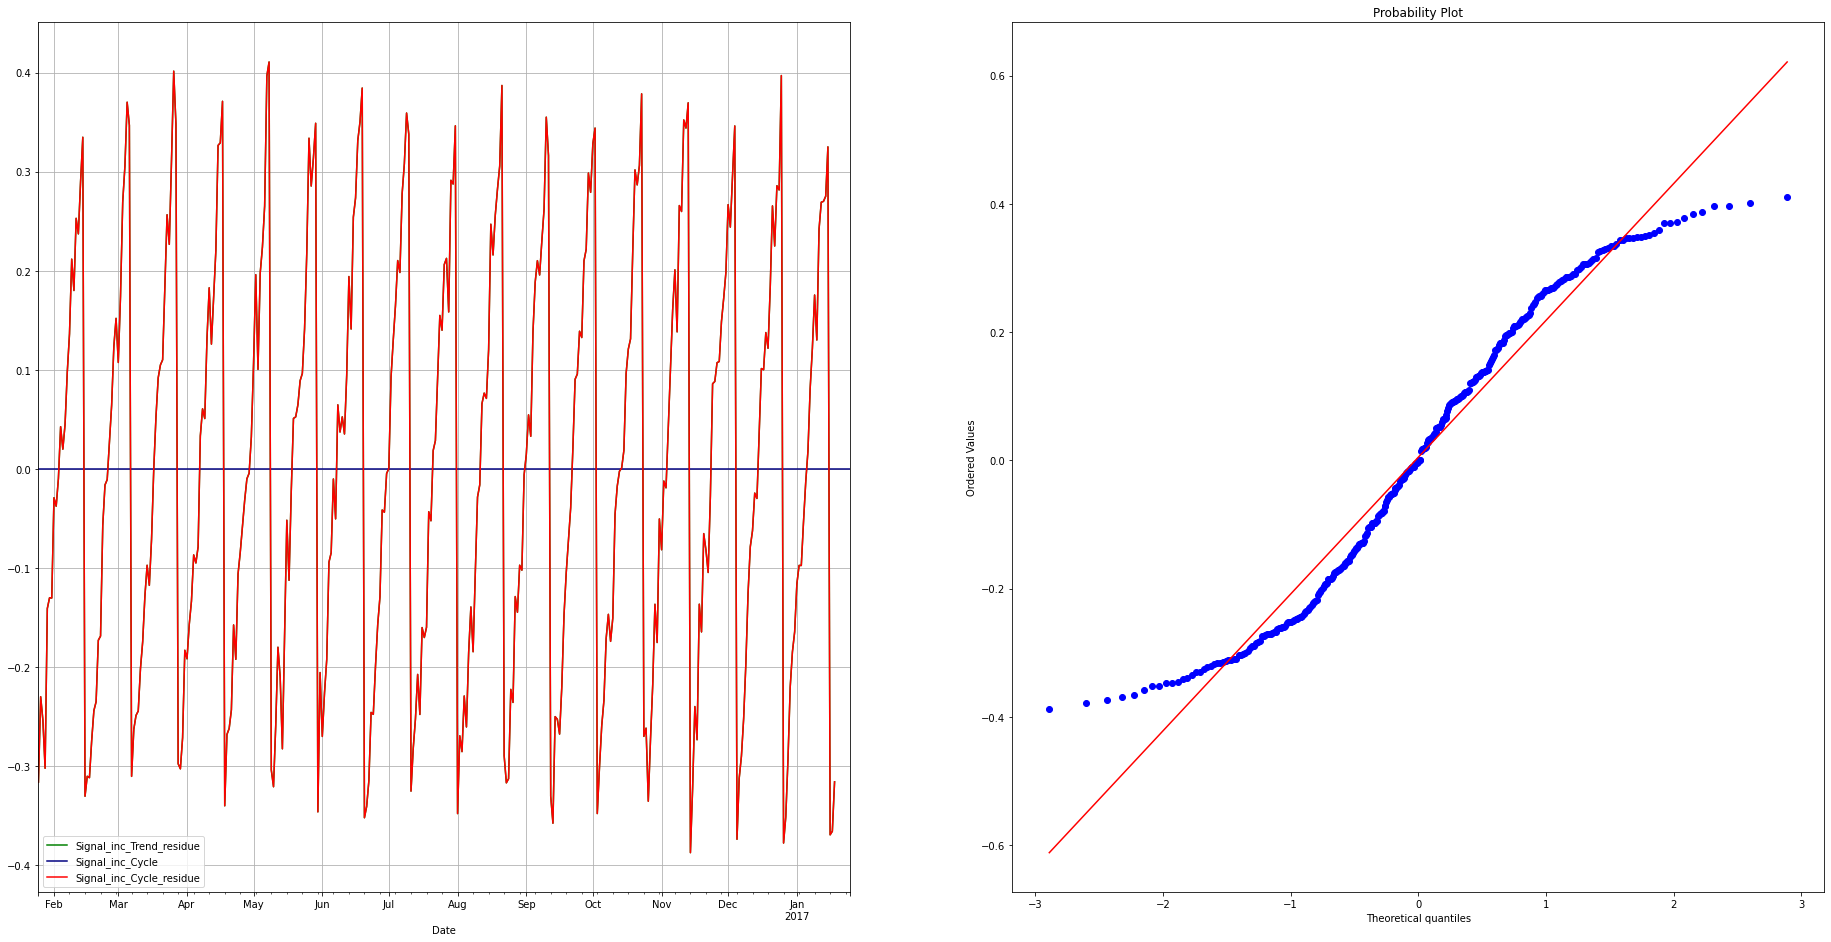

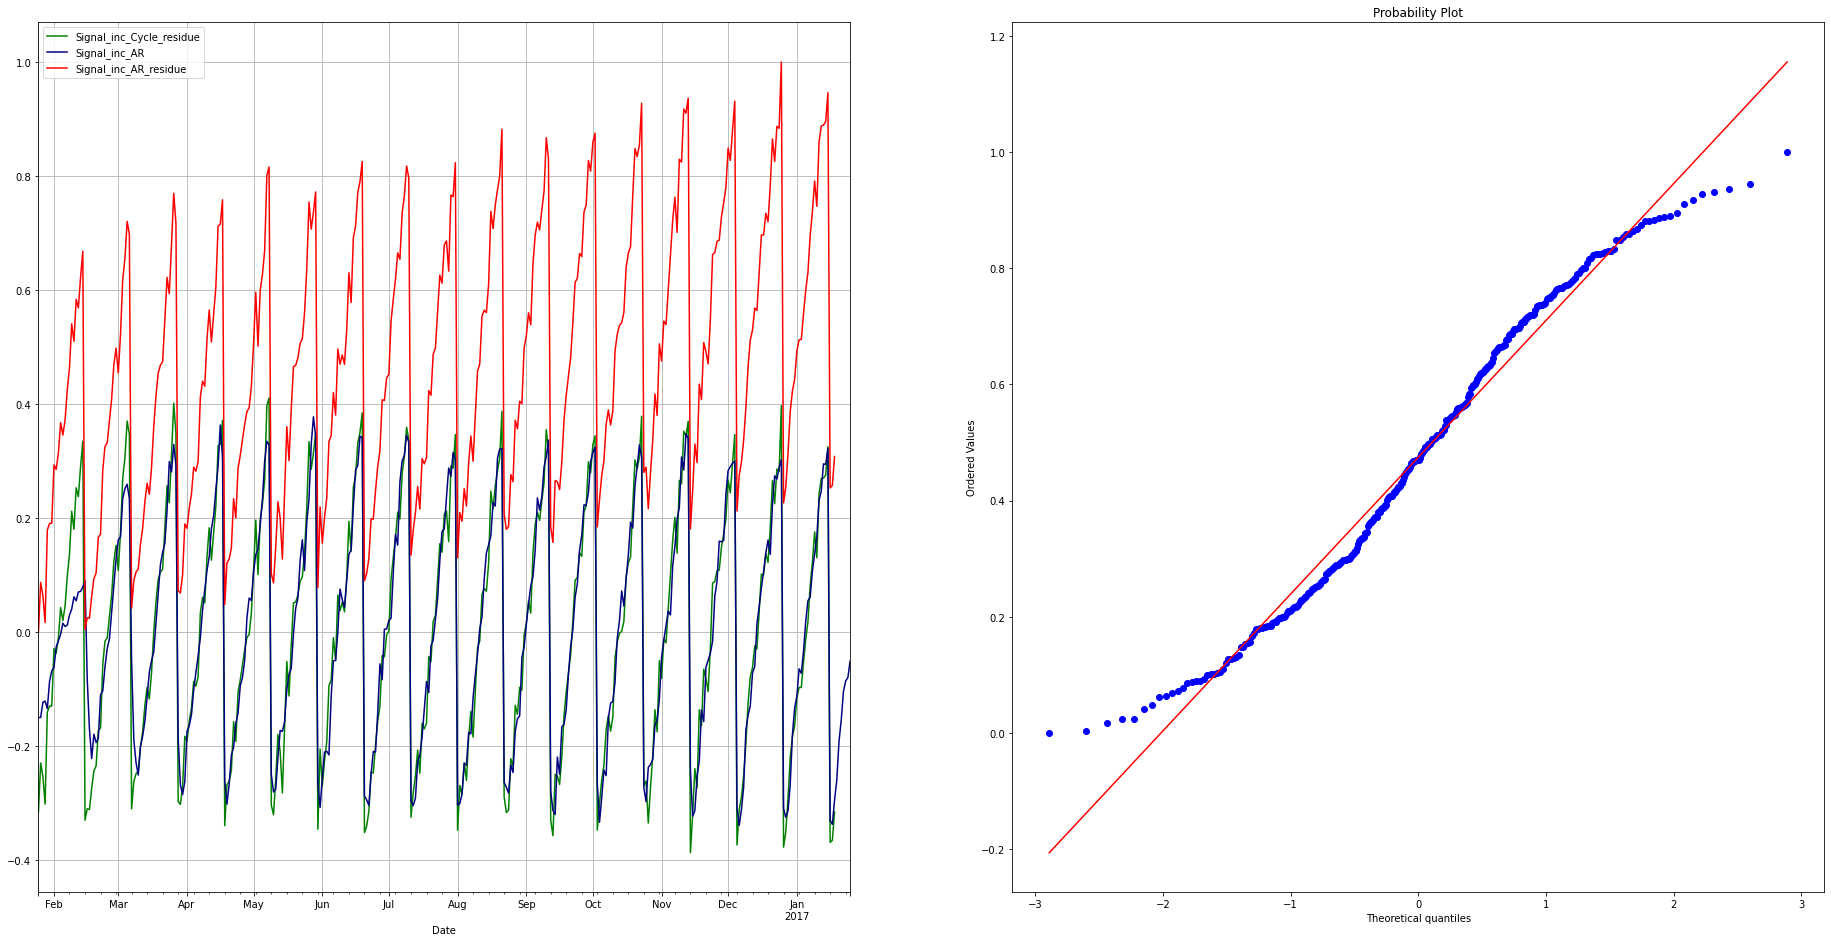

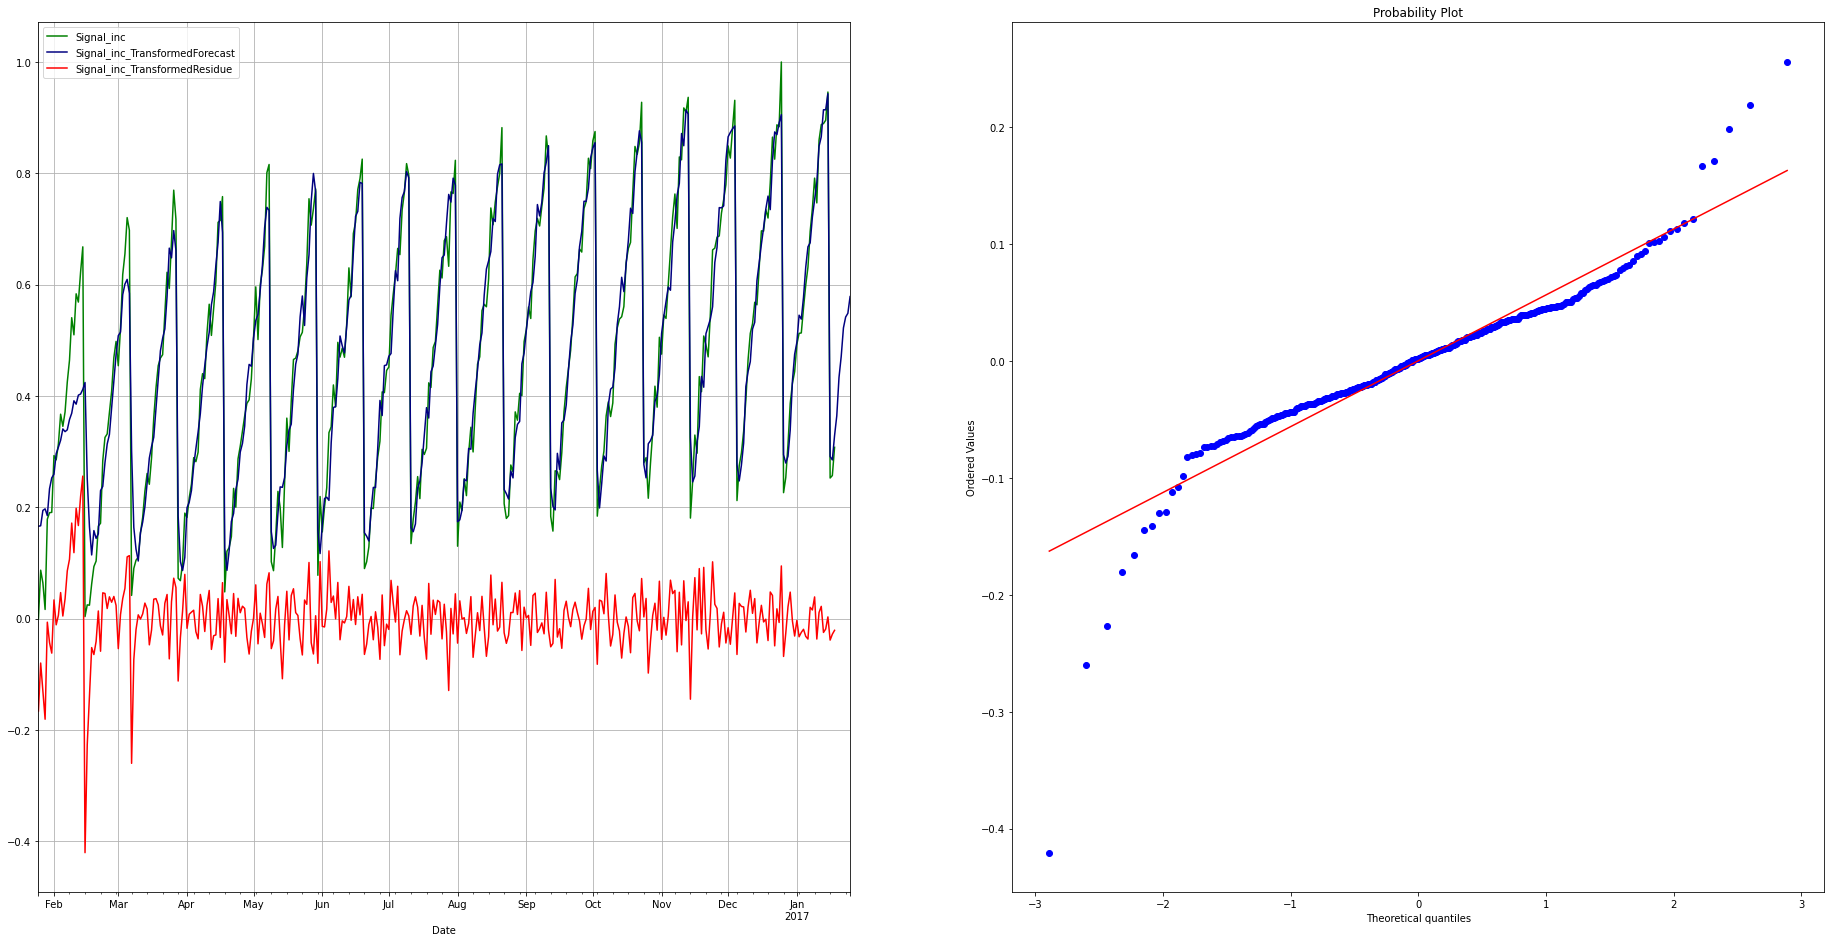

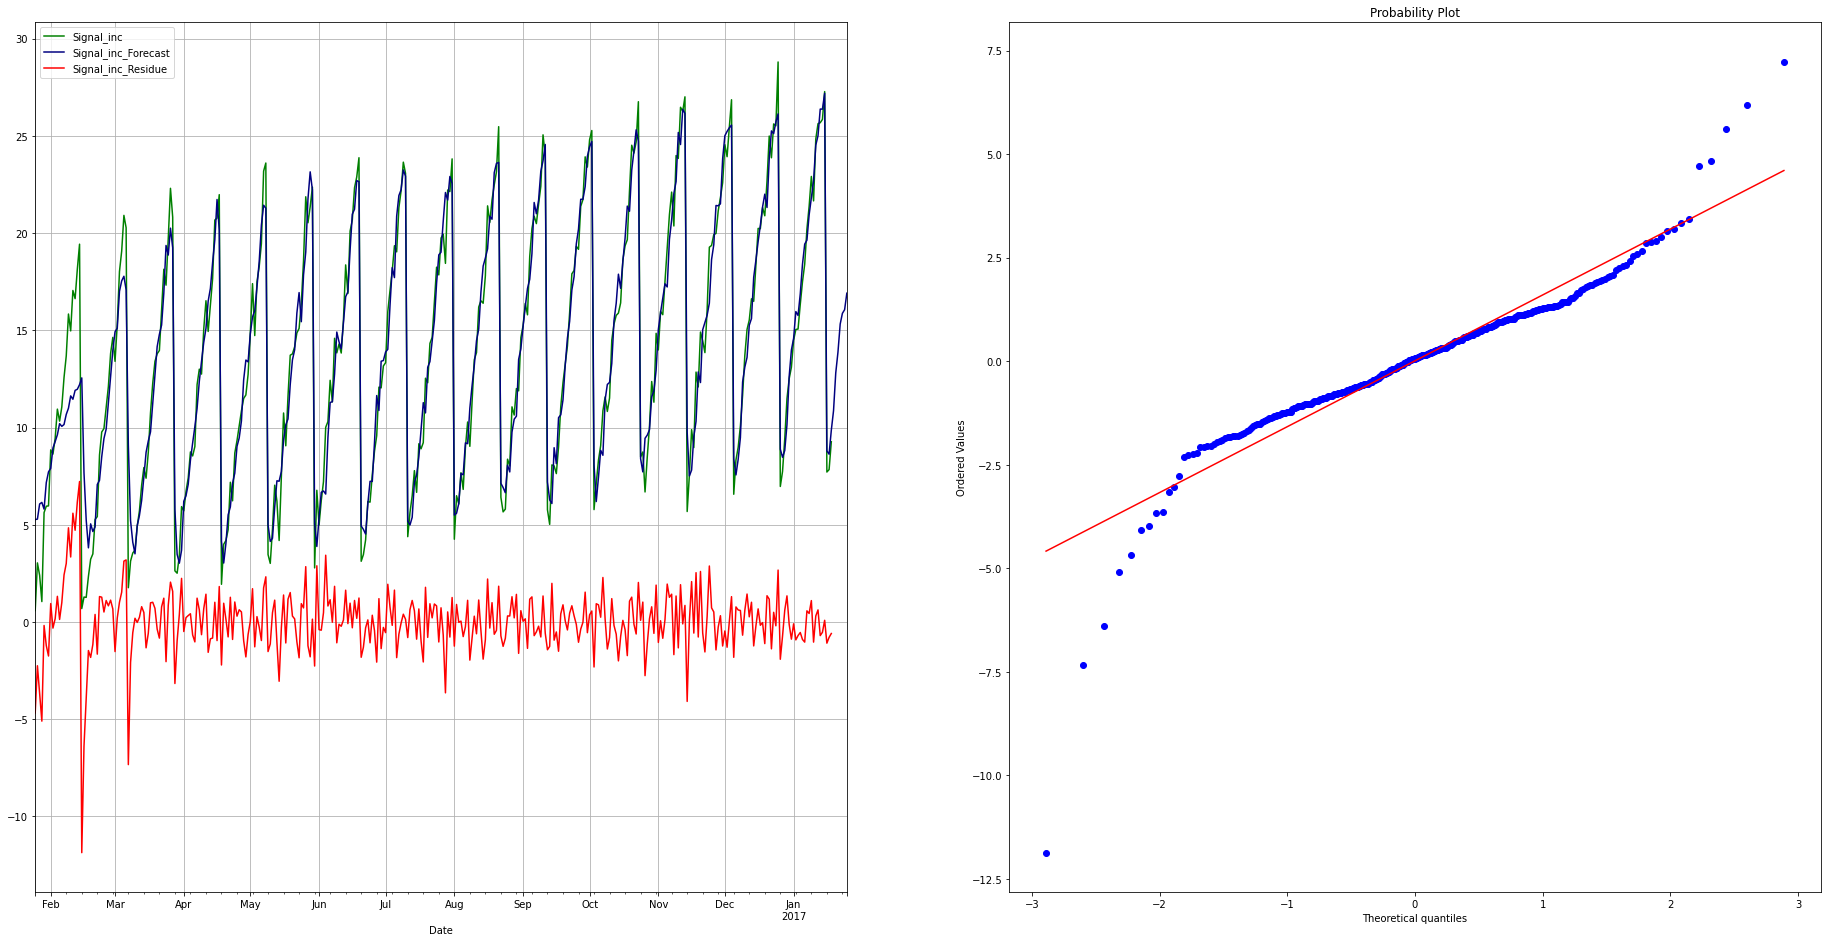

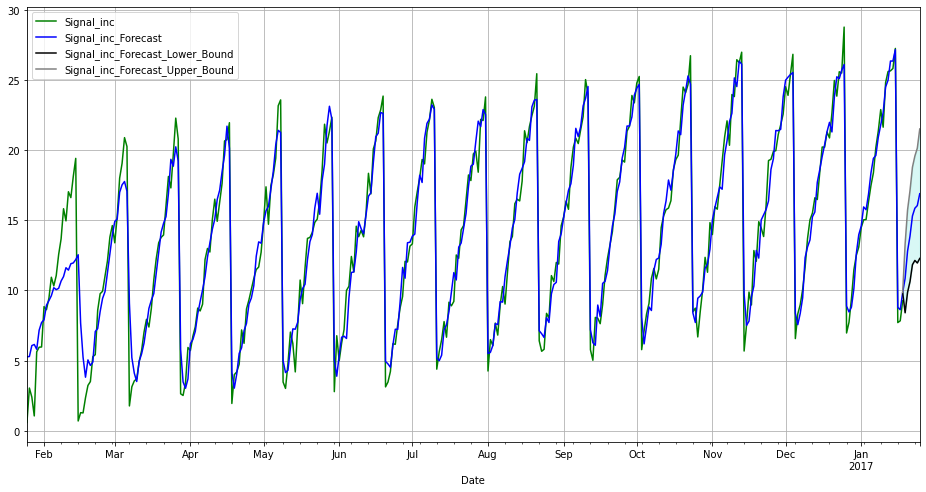

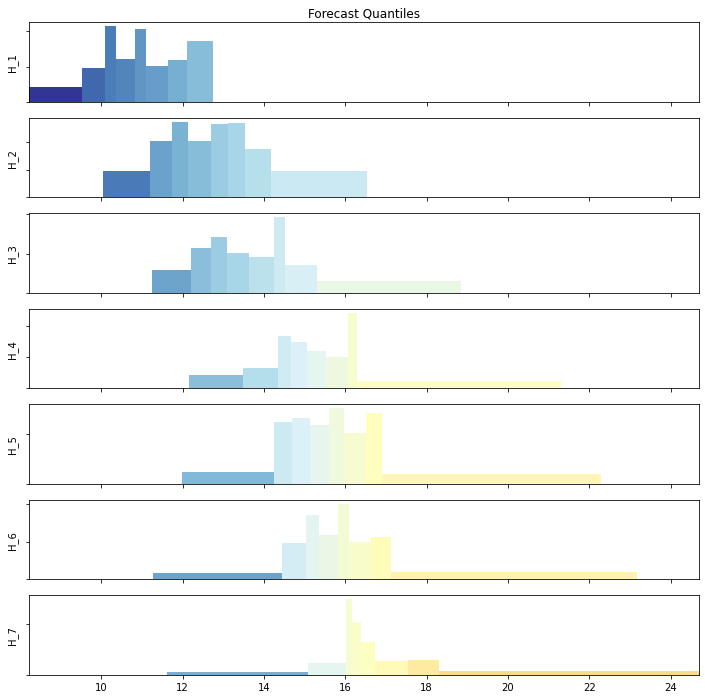

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
print(df_forecast['Date'].tail(7).values)

print(df_forecast['Signal_inc_Forecast'].tail(7).values)
print(df_forecast['Signal_dec_Forecast'].tail(7).values)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.308, ('FORECASTING', {'Signals': ['Signal_dec', 'Signal_inc'], 'Horizon': 7}))


Index(['Date', 'Signal_dec', 'row_number', 'Date_Normalized', '_Signal_dec',
       '_Signal_dec_LinearTrend', '_Signal_dec_LinearTrend_residue',
       '_Signal_dec_LinearTrend_residue_zeroCycle[0.0]',
       '_Signal_dec_LinearTrend_residue_zeroCycle[0.0]_residue',
       '_Signal_dec_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)',
       '_Signal_dec_LinearTrend_residue_zeroCycle[0.0]_residue_AR(64)_residue',
       '_Signal_dec_Trend', '_Signal_dec_Trend_residue', '_Signal_dec_Cycle',
       '_Signal_dec_Cycle_residue', '_Signal_dec_AR', '_Signal_dec_AR_residue',
       '_Signal_dec_TransformedForecast', 'Signal_dec_Forecast',
       '_Signal_dec_TransformedResidue', 'Signal_dec_Residue',
       'Signal_dec_Forecast_Lower_Bound', 'Signal_dec_Forecast_Upper_Bound',
       'Signal_dec_Forecast_Quantile_2', 'Signal_dec_Forecast_Quantile_14',
       'Signal_dec_Forecast_Quantile_26', 'Signal_dec_Forecast_Quantile_38',
       'Signal_dec_Forecast_Quantile_50', 'Signal_dec_Forecast_Q